# 第五回：样式色彩秀芳华 :id=task05
---
（本学习笔记来源于[DataWhale-数据可视化](https://datawhalechina.github.io/fantastic-matplotlib/)）

```
An act of true love will thaw a frozen heart.
真爱能融化冰冻的心。
```

本回知识归纳：  
- 绘图样式: 修改预定义样式，自定义样式，rcparams和matplotlibrc文件。
- 颜色使用: 常见的5种表示单色颜色的基本方法，以及colormap多色显示的方法。

## matplotlib的绘图样式（style） :id=task05_101


`matplotlib`贴心地提供了许多内置的样式供用户使用，使用方法很简单，只需在`python`脚本的最开始使用`plt.style.use('样式名')`语句即可;


#### 预定义样式 :id=task05_1011

我们先来看看预置的样式：


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


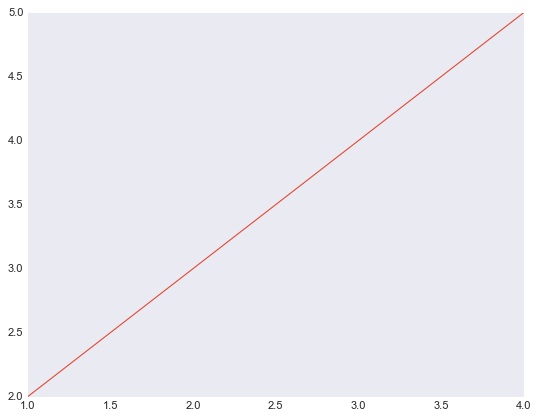

In [10]:
plt.style.use('seaborn-dark')
plt.plot([1,2,3,4],[2,3,4,5]);

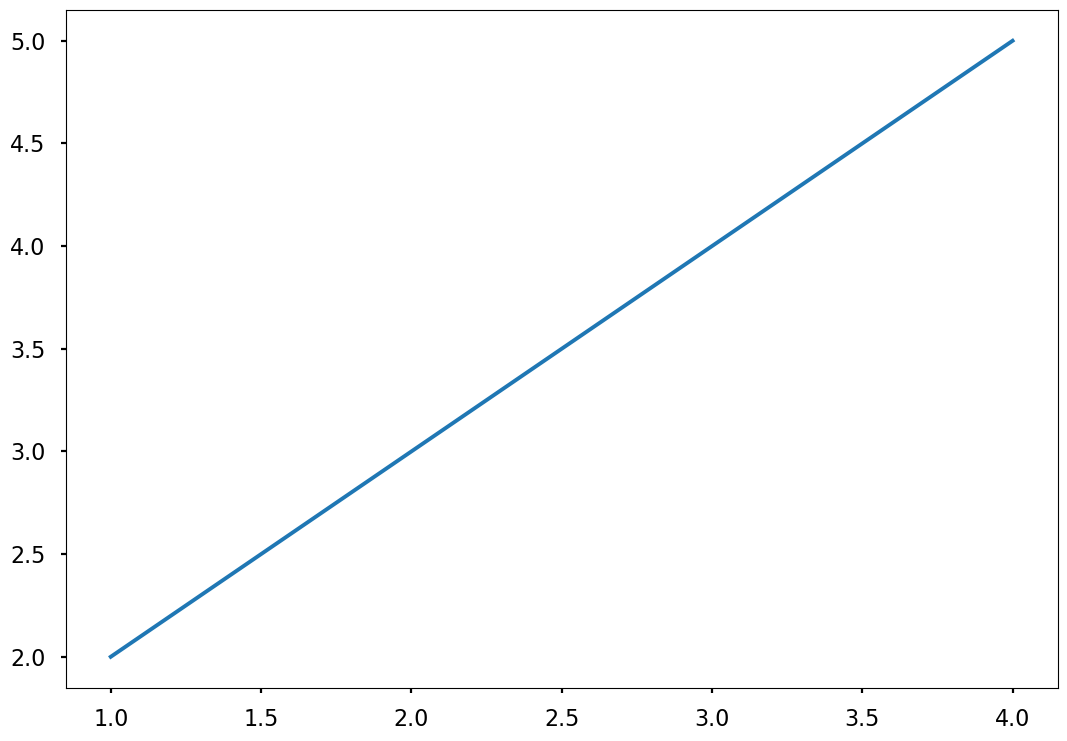

In [10]:
plt.style.use('seaborn-poster')
plt.plot([1,2,3,4],[2,3,4,5]);

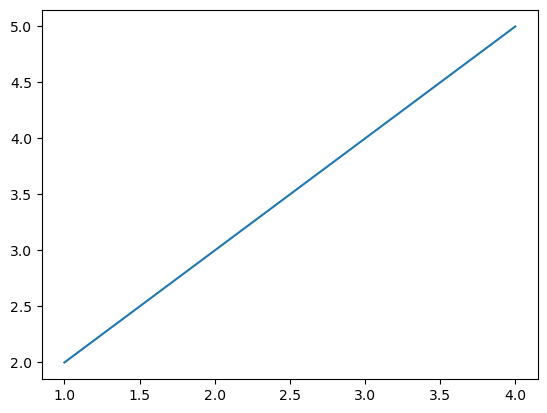

In [9]:
plt.style.use('default')
plt.plot([1,2,3,4],[2,3,4,5]);


#### 用户自定义stylesheet :id=task05_1012

在任意路径下创建一个后缀名为`mplstyle`的样式清单文件，编辑文件添加以下样式内容：

axes.titlesize : 24  
axes.labelsize : 20    
lines.linewidth : 3  
lines.markersize : 10  
xtick.labelsize : 16  
ytick.labelsize : 16  

然后执行代码看看效果：

In [18]:
import os.path
os.path.isfile('style/mystyle.mplstyle')

True

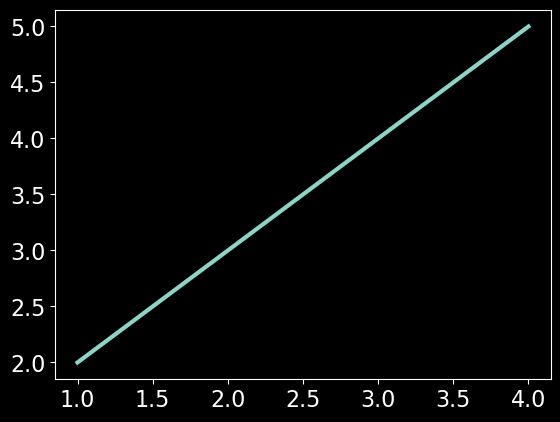

In [22]:
import matplotlib.pyplot as plt
plt.style.use('style/mystyle.mplstyle')
plt.plot([1,2,3,4],[2,3,4,5]);
plt.show()



matplotlib支持混合样式的引用，只需在引用时输入一个样式列表，若是几个样式中涉及到同一个参数，右边的样式表会覆盖左边的值。

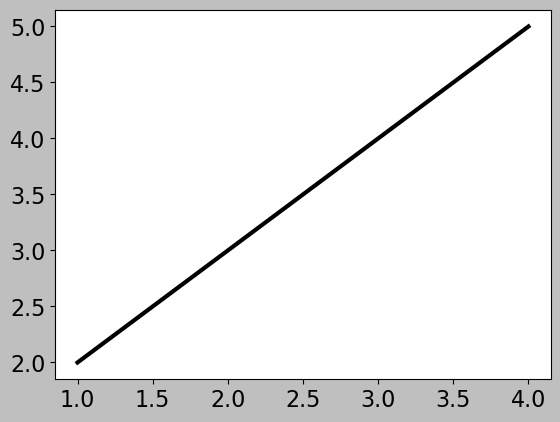

In [25]:
plt.style.use(['grayscale', 'style/mystyle.mplstyle'])
plt.plot([1,2,3,4],[2,3,4,5]);

#### 设置rcparams :id=task05_1013

我们还可以通过修改默认`rc`设置的方式改变样式，所有`rc`设置都保存在一个叫做 `matplotlib.rcParams`的变量中。  
修改过后再绘图，可以看到绘图样式发生了变化。

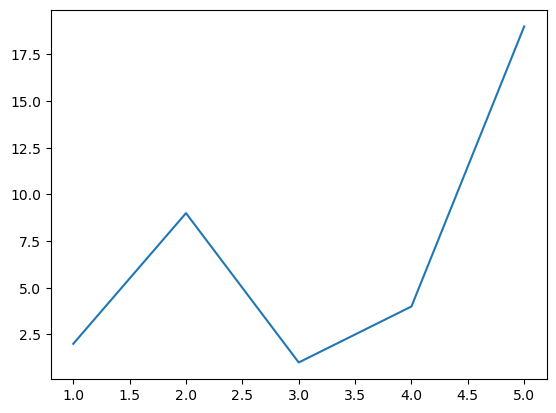

In [27]:
plt.style.use('default') # 恢复到默认样式
plt.plot([1, 2, 3, 4, 5], [2, 9, 1, 4, 19])

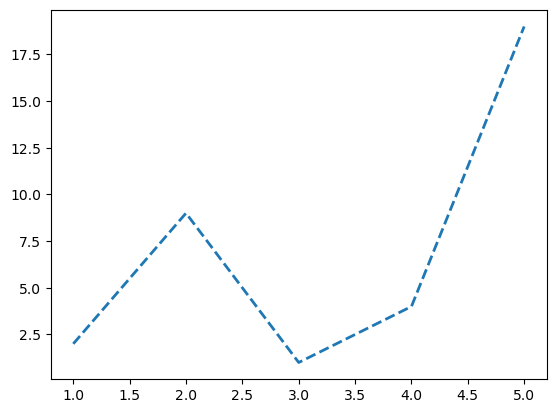

In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.plot([1, 2, 3, 4, 5], [2, 9, 1, 4, 19])

另外matplotlib也还提供了了一种更便捷的修改样式方式，可以一次性修改多个样式。

In [30]:
mpl.rc('lines', linewidth=4, linestyle='-.')


#### 修改matplotlibrc文件 

由于matplotlib是使用matplotlibrc文件来控制样式的，也就是上一节提到的rc setting，所以我们还可以通过修改matplotlibrc文件的方式改变样式。

In [31]:
# 查找matplotlibrc文件的路径
mpl.matplotlib_fname()

'd:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

找到路径后，就可以直接编辑样式文件了，打开后看到的文件格式大致是这样的，文件中列举了所有的样式参数，找到想要修改的参数，比如`lines.linewidth: 8`，并将前面的注释符号去掉，此时再绘图发现样式以及生效了。

找到路径后，就可以直接编辑样式文件了，打开后看到的文件格式大致是这样的，文件中列举了所有的样式参数，找到想要修改的参数，比如lines.linewidth: 8，并将前面的注释符号去掉，此时再绘图发现样式以及生效了。

![img.png](task05_101.png)

## matplotlib的色彩设置（color） :id=task05_102


#### RGB或RGBA

颜色用[0,1]之间的浮点数表示，四个分量按顺序分别为(`red`, `green`,`blue`, `alpha`)，其中`alpha`透明度可省略

```
plt.plot([1,2,3],[4,5,6],color=(0.1, 0.2, 0.5))
```
#### HEX RGB 或 RGBA

用十六进制颜色码表示，同样最后两位表示透明度，可省略
```        
plt.plot([1,2,3],[4,5,6],color='#0f0f0f')
```

#### 灰度色阶

当只有一个位于[0,1]的值时，表示灰度色阶
```
plt.plot([1,2,3],[4,5,6],color='0.5')
```
#### 单字符基本颜色
```
plt.plot([1,2,3],[4,5,6],color='m')
```
matplotlib有八个基本颜色，可以用单字符串来表示，分别是`’b’, ‘g’, ‘r’, ‘c’, ‘m’, ‘y’, ‘k’, ‘w’`，对应的是`blue, green, red, cyan, magenta, yellow, black, and white`的英文缩写


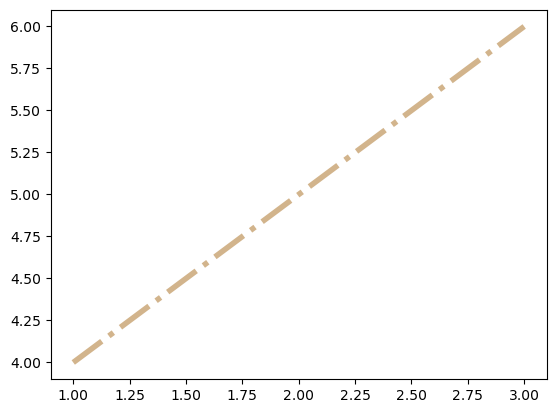

In [34]:
plt.plot([1,2,3],[4,5,6],color='tan')
plt.show()

#### colormap 设置更丰富的颜色

在matplotlib中，colormap共有五种类型:

顺序（Sequential）。通常使用单一色调，逐渐改变亮度和颜色渐渐增加，用于表示有顺序的信息

发散（Diverging）。改变两种不同颜色的亮度和饱和度，这些颜色在中间以不饱和的颜色相遇;当绘制的信息具有关键中间值（例如地形）或数据偏离零时，应使用此值。

循环（Cyclic）。改变两种不同颜色的亮度，在中间和开始/结束时以不饱和的颜色相遇。用于在端点处环绕的值，例如相角，风向或一天中的时间。

定性（Qualitative）。常是杂色，用来表示没有排序或关系的信息。

杂色（Miscellaneous）。一些在特定场景使用的杂色组合，如彩虹，海洋，地形等。

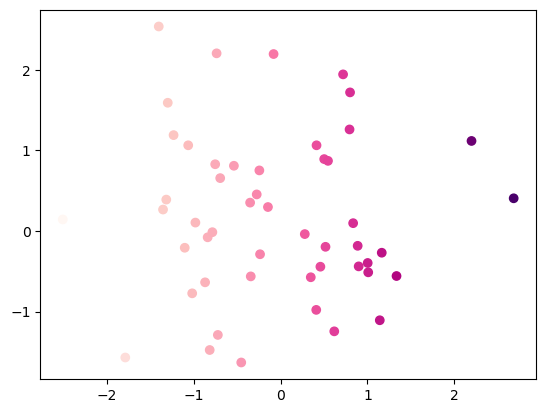

In [37]:
x = np.random.randn(50)
y = np.random.randn(50)
plt.scatter(x,y,c=x,cmap='RdPu');

有兴趣的同学，可以查阅：https://matplotlib.org/stable/tutorials/colors/colormaps.html

## 参考资料

- [datawhale-matplotlib数据可视化-29期](https://datawhalechina.github.io/fantastic-matplotlib/)
- [Python绘图总结(Matplotlib篇)之画布、颜色、及样式](https://blog.csdn.net/qq_46110834/article/details/111656067)
- [matplotlib官网样式使用指南](https://matplotlib.org/stable/tutorials/introductory/customizing.html?highlight=rcparams)  
- [matplotlib官网色彩使用指南](https://matplotlib.org/stable/tutorials/colors/colors.html#sphx-glr-tutorials-colors-colors-py) 
